## Observations and Insights 

In [1]:
#OBSERVATIONS:
'''
1a: From a first glance at the BoxPlot - it seems that Capomulin and Ramicane groups showed 
a much lower distribution of Final Tumor Volume - suggesting these drugs may have a larger effect
1b: Referring to the Summary Statistics chart, both Capomulin and Ramicane also had significantly
lower average tumor volume while also having the least variance and standard deviations. 
This also suggests these drugs may have a larger effect with a tighter cluster of lower volume tumors.

2: Looking at the Bar and Pie charts - the obervation to be made is that the demographics are evenly
distributed among the sample. This already suggests that the population should behave relatively 
normally, save for the variables that are being altered. In short, it supports the validity of the experimental groups
and strengthens trust in the results.


3: The correlation coefficient of .84 shows a strong correlation between the weight of the mouse
and the average tumor volume. This makes sense as heavier mice would have larger general size and
structure, meaning that larger tumors may be "easier" for heavier mice to grow. It would be interesting to see if the
for the other drug regimens was similariy correlated, or if there was a 
different relationship between mouse weight and average tumor volume
'''

'\n1a: From a first glance at the BoxPlot - it seems that Capomulin and Ramicane groups showed \na much lower distribution of Final Tumor Volume - suggesting these drugs may have a larger effect\n1b: Referring to the Summary Statistics chart, both Capomulin and Ramicane also had significantly\nlower average tumor volume while also having the least variance and standard deviations. \nThis also suggests these drugs may have a larger effect with a tighter cluster of lower volume tumors.\n\n2: Looking at the Bar and Pie charts - the obervation to be made is that the demographics are evenly\ndistributed among the sample. This already tells me that the population should behave relatively \nnormally, save for the variables that are being altered. In short, it lets me know that the structure\nof the experiment looks sound and lets me trust the results more.\n\n\n3: The correlation coefficient of .84 shows us a strong correlation between the weight of the mouse\nand the average tumor volume. Th

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
MergedData_df = pd.merge(study_results, mouse_metadata, on="Mouse ID",how="left")
# Display the data table for preview
MergedData_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
DupList = []
#creates a list of booleans designating whether the mouse ID is duplicate and adds it to the last row"
MergedData_df["dup"] = MergedData_df.duplicated(subset=["Mouse ID", "Timepoint"])
#creates list of duplicated Mouse IDs for reference against main dataframe
for index, row in MergedData_df.iterrows():
    if row["dup"] == True:
        DupList.append(row["Mouse ID"])
#creates a clean dataframe to be used moving forward without the duplicated mouse data
Clean_df = MergedData_df[MergedData_df['Mouse ID'].isin(DupList)==False]

In [4]:
# Checking the number of mice in the clean DataFrame.
CleanTotalMice = Clean_df["Mouse ID"].unique()
print(f"All duplicates removed: {len(CleanTotalMice)} mice participated in this study.")

All duplicates removed: 248 mice participated in this study.


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
SummaryStats = pd.DataFrame(columns=["Mean", "Median", "Variance", "Standard Deviation", "SEM"])
# This method produces everything in a single groupby function
Regimen_gb = Clean_df.groupby(["Drug Regimen"])
SummaryStats["Mean"] = Regimen_gb["Tumor Volume (mm3)"].mean()
SummaryStats["Median"]  = Regimen_gb["Tumor Volume (mm3)"].median()
SummaryStats["Variance"] = Regimen_gb["Tumor Volume (mm3)"].var()
SummaryStats["Standard Deviation"] = Regimen_gb["Tumor Volume (mm3)"].std()
SummaryStats["SEM"] = Regimen_gb["Tumor Volume (mm3)"].sem()
SummaryStats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

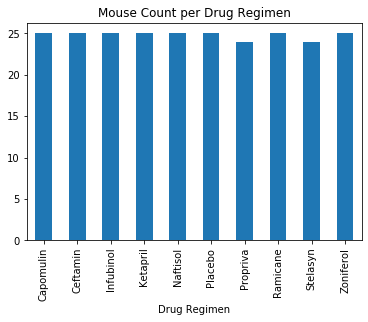

In [6]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#removes duplicates to keep only one entry for each mouseID
#NO MATPLOTLIB FUNCTIONS USED FOR PANDAS CHART
BarChart_df = Clean_df.drop_duplicates(subset=["Mouse ID"], keep="first")
BarPlot_gb = BarChart_df.groupby(["Drug Regimen"])
xBarPD = BarPlot_gb["Mouse ID"].count()
xBarPD.plot(kind = "bar", width=.5, title="Mouse Count per Drug Regimen")

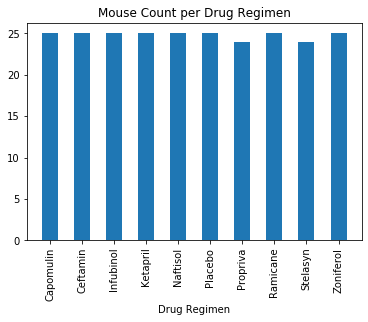

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#creating list of drug regimens to be x_axis labels
xBarPLT = Clean_df["Drug Regimen"].unique()
#sorting alphabetically to match other chart
xBarPLT.sort()
#plot chart and update format to match above
plt.bar(xBarPLT,BarPlot_gb["Mouse ID"].count(), width=.5)
plt.title("Mouse Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

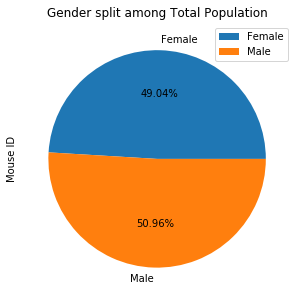

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#NO MATPLOTLIB FUNCTIONS USED FOR PANDAS CHART
Gender_gb = Clean_df.groupby(["Sex"])
Gender_df = pd.DataFrame(Gender_gb["Mouse ID"].count())
Gender_df.plot.pie(y="Mouse ID", title="Gender split among Total Population", figsize=(5,5),autopct="%1.2f%%")

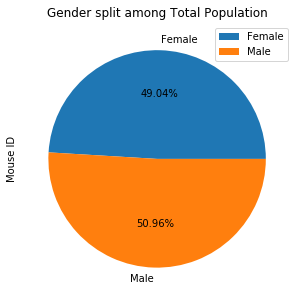

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plot chart and update format to match above
plt.figure(figsize=(5,5))
plt.pie(Gender_df["Mouse ID"], labels = ["Female","Male"],autopct="%1.2f%%")
plt.title("Gender split among Total Population")
plt.ylabel("Mouse ID")
plt.legend(labels = ["Female","Male"])
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
FinalTumorTimepoint = Clean_df.groupby(["Mouse ID"])["Timepoint"].max()
# Merge this group df with the original dataframe to  get the tumor volume at the last timepoint
Combined_df = pd.merge(Clean_df,FinalTumorTimepoint,on="Mouse ID")

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
DrugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#using LOC to get pull only last timepoint entry rows for only our 4 drug regimens
Combined_df = Combined_df.loc[Combined_df["Timepoint_x"]==Combined_df["Timepoint_y"]]
DrugList_df = Combined_df.loc[Combined_df["Drug Regimen"].isin(DrugList)==True] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for Drug in DrugList:
    Clear = False
    Drug_df = DrugList_df.loc[DrugList_df["Drug Regimen"] == Drug]
    Quartiles = Drug_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    LowerQ = Quartiles[0.25]
    UpperQ = Quartiles[0.75]
    IQR = UpperQ-LowerQ

    Lower_Lim = LowerQ - (1.5*IQR)
    Upper_Lim = UpperQ + (1.5*IQR)
    print(f"{Drug} IQR:{IQR}")
    print(f"{Drug} Lower Limit:{Lower_Lim}")
    print(f"{Drug} Upper Limit:{Upper_Lim}")
# Determine outliers using upper and lower bounds    
    for index, row in Drug_df.iterrows():
            #catches upper limit break - prints the metadata for that mouse
            if row["Tumor Volume (mm3)"] > Upper_Lim:
                print("The following potential outlier was above the upper bounds:"+'\n')
                print(row)
                print('\n')
            #catches lower limit break - prints the metadata for that mouse
            elif row["Tumor Volume (mm3)"] < Lower_Lim:
                print("The following potential outlier was below the lower bounds:"+'\n')
                print(row)
                print('\n')
            #if no breaks for this Drug Regimen, set Clear switch to True so last if statement catches
            else:
                Clear = True
    #if no outliers were detected, lets the user know
    if Clear == True:
        print(f"{Drug} Quantitative Quartile Test Run: No Outliers found in data"+'\n')

Capomulin IQR:7.781863460000004
Capomulin Lower Limit:20.70456164999999
Capomulin Upper Limit:51.83201549
Capomulin Quantitative Quartile Test Run: No Outliers found in data

Ramicane IQR:9.098536719999998
Ramicane Lower Limit:17.912664470000003
Ramicane Upper Limit:54.30681135
Ramicane Quantitative Quartile Test Run: No Outliers found in data

Infubinol IQR:11.477135160000003
Infubinol Lower Limit:36.83290494999999
Infubinol Upper Limit:82.74144559000001
The following potential outlier was below the lower bounds:

Mouse ID                   c326
Timepoint_x                   5
Tumor Volume (mm3)      36.3213
Metastatic Sites              0
Drug Regimen          Infubinol
Sex                      Female
Age_months                   18
Weight (g)                   25
dup                       False
Timepoint_y                   5
Name: 214, dtype: object


Infubinol Quantitative Quartile Test Run: No Outliers found in data

Ceftamin IQR:15.577752179999997
Ceftamin Lower Limit:25.3554495

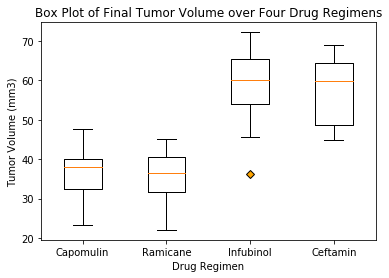

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#create individual Dataframes for each drug regimen
Capomulin_df = DrugList_df.loc[DrugList_df["Drug Regimen"] == "Capomulin"]
Ramicane_df = DrugList_df.loc[DrugList_df["Drug Regimen"] == "Ramicane"]
Infubinol_df = DrugList_df.loc[DrugList_df["Drug Regimen"] == "Infubinol"]
Ceftamin_df = DrugList_df.loc[DrugList_df["Drug Regimen"] == "Ceftamin"]
#plot the lists
BoxPlotLists = [Capomulin_df["Tumor Volume (mm3)"],Ramicane_df["Tumor Volume (mm3)"],Infubinol_df["Tumor Volume (mm3)"],Ceftamin_df["Tumor Volume (mm3)"]]
#establish formatting parameter  to be passed later
flierprops = dict(marker='D', markerfacecolor='orange', markersize=5)
#establish subplots and adjust formatting
figure, axis = plt.subplots()
axis.set_title("Box Plot of Final Tumor Volume over Four Drug Regimens")
axis.set_ylabel("Tumor Volume (mm3)")
axis.set_xlabel("Drug Regimen")
#plot chart
axis.boxplot(BoxPlotLists,labels=DrugList,flierprops=flierprops)
plt.show()

## Line and Scatter Plots

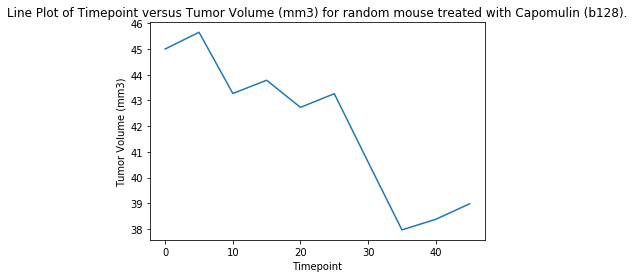

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#randomly samples one mouse from the Capomulin regimen
RandomMouse = Clean_df.loc[Clean_df["Drug Regimen"] == "Capomulin"].sample(1)
#pulls just the mouseID for that entry
RandomMouseID = RandomMouse.iloc[0,0]
#pulls all timepoint data for that mouseID
RandomMouse_df = Clean_df.loc[Clean_df["Mouse ID"] == RandomMouseID]
#plots mouse data and applies proper formatting
plt.plot(RandomMouse_df["Timepoint"],RandomMouse_df["Tumor Volume (mm3)"])
plt.title(f"Line Plot of Timepoint versus Tumor Volume (mm3) for random mouse treated with Capomulin ({RandomMouseID}).")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

## Correlation and Regression

The Correlation Coefficient between Mouse Weight and Average Tumor Volume is: 0.84
The r-squared between Mouse Weight and Average Tumor Volume is: 0.7088568047708717
Line Equation: y = 0.95x + 21.55


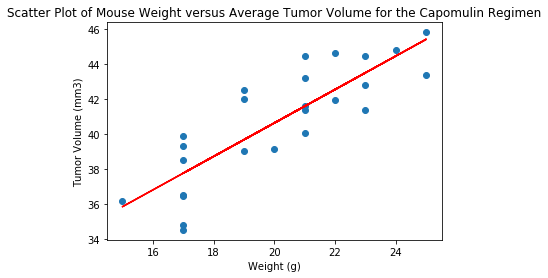

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
ScatterData_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Capomulin"]
#establishes dataframe to be used with only capomulin regimen data and nececarry columns
Scatter_df = ScatterData_df[["Mouse ID","Weight (g)"]]
#use groupby to find average tumor volume for each mouse
Scatter_gb = ScatterData_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
#merge average tumor volume into Dataframe
Scatter_df = pd.merge(Scatter_df, Scatter_gb, on=["Mouse ID"])
#removes duplicate values since weight and average tumor volume are consistent across Mouse ID
Scatter_df=Scatter_df.drop_duplicates()

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Scatter_df["Weight (g)"],Scatter_df["Tumor Volume (mm3)"])
print(f"The Correlation Coefficient between Mouse Weight and Average Tumor Volume is: {round(correlation[0],2)}")
#set up lineregression formula from Stats using our same dataset for correlation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Scatter_df["Weight (g)"], Scatter_df["Tumor Volume (mm3)"])
#establish regression line with data values
regress_values = Scatter_df["Weight (g)"] * slope + intercept
#established line equation that will be used for printout and line annotation
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#provides output to user on linear regression model
print(f"The r-squared between Mouse Weight and Average Tumor Volume is: {rvalue**2}")
print(f"Line Equation: {line_equation}")
#plots scatterplot
plt.scatter(Scatter_df["Weight (g)"],Scatter_df["Tumor Volume (mm3)"])
#plots red line on graph
plt.plot(Scatter_df["Weight (g)"],regress_values,"r-")
#adjusts formatting and prints graph
plt.title("Scatter Plot of Mouse Weight versus Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()